In [3]:
import pandas as pd
import numpy as np
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

# Load Cleaned data

In [4]:
imported_data = pd.read_csv("clean_data.csv", index_col=False)
imported_data.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.475273,6.514536,0.736794,0.90962,0.775362,2.595028,7.097075,0.134061,0.036833,0.093244
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,3.564759,1.571156,0.41549,0.417344,1.042918,1.436007,0.340718,0.188352,0.290775
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.000000,0.000000,1.00000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7.000000,0.000000,1.00000,1.000000,3.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,9.000000,0.000000,1.00000,1.000000,3.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,12.000000,5.000000,3.00000,1.000000,4.000000,24.000000,1.000000,1.000000,1.000000


#### Data Features Selection

In [5]:
X = imported_data.iloc[: , 1:imported_data.shape[1]]
Y = imported_data.iloc[: , 0]

# Divide data to train, test and validation
### With ratios 60% (train) , 20% (test) , 20% (validation)

In [6]:
X_train, X, y_train, Y = train_test_split(X, Y, test_size=0.4, stratify=Y)
X_test, X_val, y_test, y_val = train_test_split(X , Y, test_size = 0.5, stratify=Y)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(X_val.shape))
print("y_val shape: {}".format(y_val.shape))

print()
print("y_train Values: \n{}".format(y_train.value_counts()))
print("y_test Values: \n{}".format(y_test.value_counts()))
print("y_val Values: \n{}".format(y_val.value_counts()))

X_train shape: (191877, 17)
y_train shape: (191877,)
X_test shape: (63959, 17)
y_test shape: (63959,)
X_val shape: (63959, 17)
y_val shape: (63959,)

y_train Values: 
0    175453
1     16424
Name: HeartDisease, dtype: int64
y_test Values: 
0    58484
1     5475
Name: HeartDisease, dtype: int64
y_val Values: 
0    58485
1     5474
Name: HeartDisease, dtype: int64


# Baseline (before oversampling)
Using most frequent

In [7]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.predict(X_train)
accuracy = dummy_clf.score(X_train, y_train)
print("Dummy Classifier Accuracy: {} %".format(accuracy*100))

Dummy Classifier Accuracy: 91.44034980742872 %


### Oversamling the data

In [8]:
ros = RandomOverSampler(random_state=0)
ros.fit(X_train, y_train)
X_train_over_sampled, y_train_over_sampled = ros.fit_resample(X_train, y_train)

print("X_train_over_sampled shape: {}".format(X_train_over_sampled.shape))
print("y_train_over_sampled shape: {}".format(y_train_over_sampled.shape))
print()
print("y_train_over_sampled Values: \n{}".format(y_train_over_sampled.value_counts()))

X_train_over_sampled shape: (350906, 17)
y_train_over_sampled shape: (350906,)

y_train_over_sampled Values: 
0    175453
1    175453
Name: HeartDisease, dtype: int64


In [9]:
ros = RandomOverSampler(random_state=0)
ros.fit(X_val, y_val)
X_val_over_sampled, y_val_over_sampled = ros.fit_resample(X_val, y_val)

print("X_val_over_sampled shape: {}".format(X_val_over_sampled.shape))
print("y_val_over_sampled shape: {}".format(y_val_over_sampled.shape))
print()
print("y_val_over_sampled Values: \n{}".format(y_val_over_sampled.value_counts()))

X_val_over_sampled shape: (116970, 17)
y_val_over_sampled shape: (116970,)

y_val_over_sampled Values: 
0    58485
1    58485
Name: HeartDisease, dtype: int64


In [10]:
ros = RandomOverSampler(random_state=0)
ros.fit(X_test, y_test)
X_test_over_sampled, y_test_over_sampled = ros.fit_resample(X_test, y_test)

print("X_test_over_sampled shape: {}".format(X_test_over_sampled.shape))
print("y_val_over_sampled shape: {}".format(y_test_over_sampled.shape))
print()
print("y_val_over_sampled Values: \n{}".format(y_test_over_sampled.value_counts()))

X_test_over_sampled shape: (116968, 17)
y_val_over_sampled shape: (116968,)

y_val_over_sampled Values: 
0    58484
1    58484
Name: HeartDisease, dtype: int64


# Baseline (After oversampling)
Using most frequent

In [11]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_over_sampled, y_train_over_sampled)
dummy_clf.predict(X_train_over_sampled)
accuracy = dummy_clf.score(X_train_over_sampled, y_train_over_sampled)
print("Dummy Classifier Accuracy: {} %".format(accuracy*100))

Dummy Classifier Accuracy: 50.0 %


## Decision Tree

In [12]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)
model.fit(X_train_over_sampled, y_train_over_sampled)
y_pred = model.predict(X_val_over_sampled)
print("Accuracy:",metrics.accuracy_score(y_val_over_sampled, y_pred))

Accuracy: 0.7307942207403608


## Logestic Regression

In [13]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_over_sampled, y_train_over_sampled)
y_pred = logreg.predict(X_val_over_sampled)

Text(0.5, 257.44, 'Predicted label')

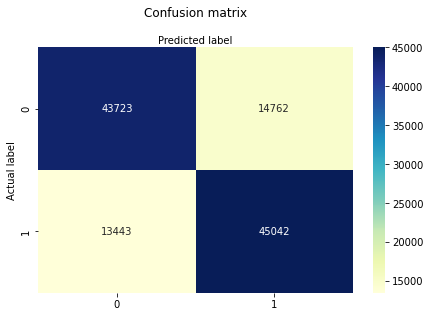

In [14]:
cnf_matrix = metrics.confusion_matrix(y_val_over_sampled, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [15]:
print("Accuracy:",metrics.accuracy_score(y_val_over_sampled, y_pred))
print("Precision:",metrics.precision_score(y_val_over_sampled, y_pred))
print("Recall:",metrics.recall_score(y_val_over_sampled, y_pred))

Accuracy: 0.7588697956741045
Precision: 0.7531603237241656
Recall: 0.7701461913311105


## Bayes Classifier

In [16]:
gnb = GaussianNB()
gnb.fit(X_train_over_sampled, y_train_over_sampled)
y_pred = gnb.predict(X_val_over_sampled)
# Accuracy
print("Accuracy:",metrics.accuracy_score(y_val_over_sampled, y_pred))

Accuracy: 0.7030606138326067
